C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4044\3578485840.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').mean()


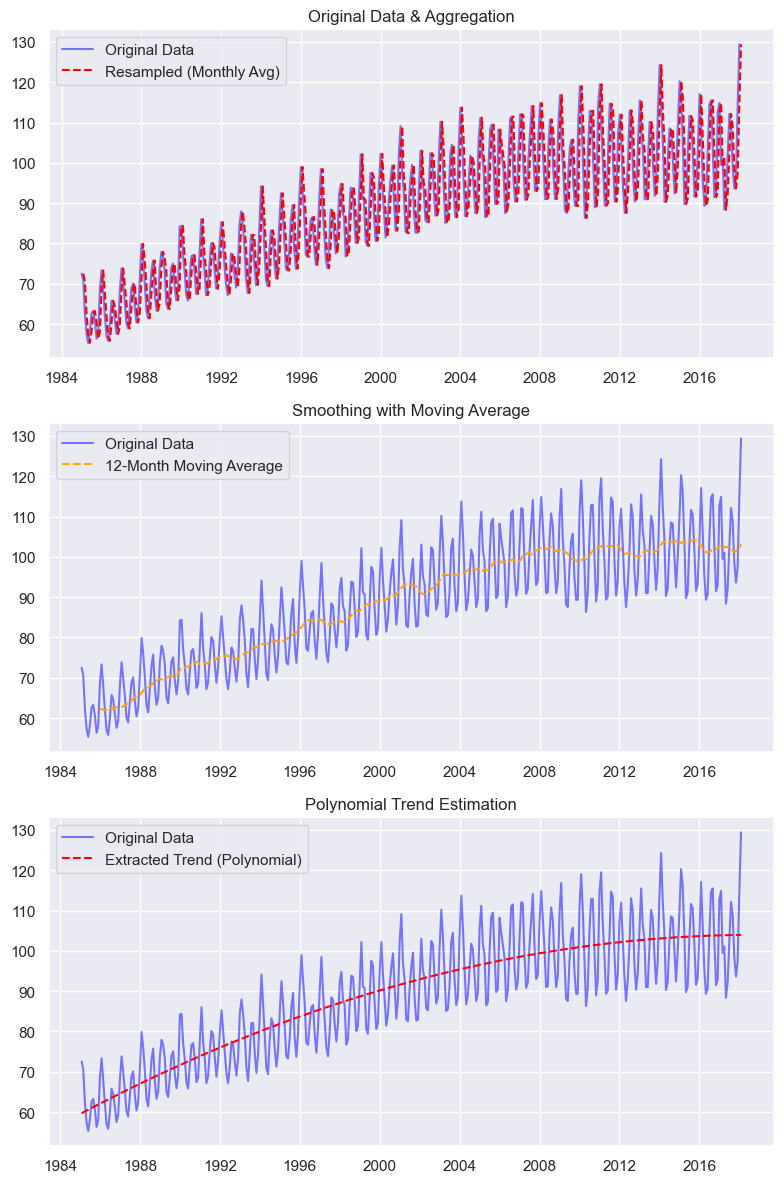

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Load dataset
file_path = r"C:\Users\Lenovo\Downloads\Electric_Production.csv"
df = pd.read_csv(file_path)

# Convert DATE to datetime and set as index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# 1. Aggregation (Resampling) - Monthly Average
df_resampled = df.resample('M').mean()

# 2. Smoothing using Moving Average
df_resampled['MA_12'] = df_resampled['IPG2211A2N'].rolling(window=12).mean()

# 3. Trend Estimation using Polynomial Fitting
def polynomial_detrend(series, degree=2):
    x = np.arange(len(series))
    coeffs = Polynomial.fit(x, series.dropna(), degree).convert().coef
    trend_estimate = sum(c * x**i for i, c in enumerate(coeffs))
    return trend_estimate

estimated_trend = polynomial_detrend(df_resampled['IPG2211A2N'])

# Visualization (Now Only 3 Graphs)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# 1. Original Data with Aggregation
axes[0].plot(df.index, df['IPG2211A2N'], alpha=0.5, label='Original Data', color='blue')
axes[0].plot(df_resampled.index, df_resampled['IPG2211A2N'], color='red', linestyle='dashed', label='Resampled (Monthly Avg)')
axes[0].set_title('Original Data & Aggregation')
axes[0].legend()

# 2. Smoothing using Moving Average
axes[1].plot(df_resampled.index, df_resampled['IPG2211A2N'], alpha=0.5, label='Original Data', color='blue')
axes[1].plot(df_resampled.index, df_resampled['MA_12'], color='orange', linestyle='dashed', label='12-Month Moving Average')
axes[1].set_title('Smoothing with Moving Average')
axes[1].legend()

# 3. Polynomial Trend Estimation
axes[2].plot(df_resampled.index, df_resampled['IPG2211A2N'], alpha=0.5, label='Original Data', color='blue')
axes[2].plot(df_resampled.index, estimated_trend, color='red', linestyle='dashed', label='Extracted Trend (Polynomial)')
axes[2].set_title('Polynomial Trend Estimation')
axes[2].legend()

plt.tight_layout()
plt.show()
